## Mass-Spring System

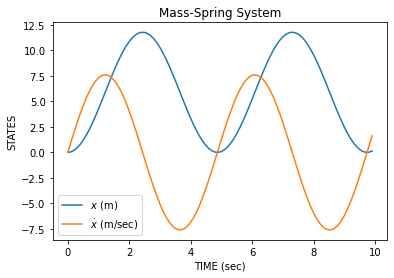

In [8]:
%matplotlib inline 
# example for a sd plot
# from https://gribblelab.org/compneuro2012/2_Modelling_Dynamical_Systems.html

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def MassSpring(state,t):
  # unpack the state vector
  x = state[0]
  xd = state[1]

  # these are our constants
  k = -2.5 # Newtons per metre
  m = 1.5 # Kilograms
  g = 9.8 # metres per second

  # compute acceleration xdd
  xdd = ((k*x)/m) + g

  # return the two state derivatives
  return [xd, xdd]

state0 = [0.0, 0.0]
t = np.arange(0.0, 10.0, 0.1)

state = odeint(MassSpring, state0, t)

plt.plot(t, state)
plt.xlabel('TIME (sec)')
plt.ylabel('STATES')
plt.title('Mass-Spring System')
plt.legend(('$x$ (m)', '$\dot{x}$ (m/sec)'))
plt.show()


## Implementing the Lorenz attractor 

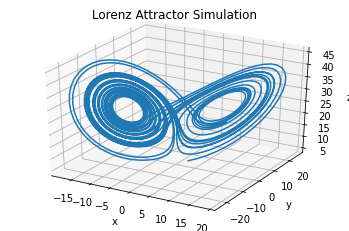

In [10]:
from scipy.integrate import odeint

def Lorenz(state,t):
  # unpack the state vector
  x = state[0]
  y = state[1]
  z = state[2]

  # these are our constants
  sigma = 10.0
  rho = 28.0
  beta = 8.0/3.0

  # compute state derivatives
  xd = sigma * (y-x)
  yd = (rho-z)*x - y
  zd = x*y - beta*z

  # return the state derivatives
  return [xd, yd, zd]

state0 = [2.0, 3.0, 4.0]
t = np.arange(0.0, 30.0, 0.01)

state = odeint(Lorenz, state0, t)

# do some fancy 3D plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(state[:,0],state[:,1],state[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Lorenz Attractor Simulation")
plt.show()

## Lotka Volterra Predator-Prey

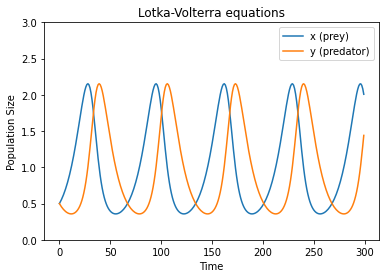

In [14]:
from scipy.integrate import odeint

def LotkaVolterra(state,t):
  x = state[0]
  y = state[1]
  alpha = 0.1
  beta =  0.1
  sigma = 0.1
  gamma = 0.1
  xd = x*(alpha - beta*y)
  yd = -y*(gamma - sigma*x)
  return [xd,yd]

t = np.arange(0,300,1)
state0 = [0.5,0.5]
state = odeint(LotkaVolterra,state0,t)
plt.figure()
plt.plot(t,state)
plt.ylim([0,3])
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('x (prey)','y (predator)'))
plt.title('Lotka-Volterra equations')
plt.show()

The Lotka Volterra can also be simulated through its state space

AttributeError: module 'turtle' has no attribute 'draw'

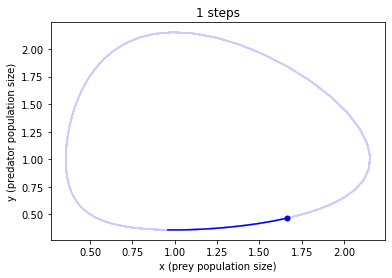

In [22]:
# animation in state-space
plt.figure()
pb, = plt.plot(state[:,0],state[:,1],'b-',alpha=0.2)
plt.xlabel('x (prey population size)')
plt.ylabel('y (predator population size)')
p, = plt.plot(state[0:10,0],state[0:10,1],'b-')
pp, = plt.plot(state[10,0],state[10,1],'b.',markersize=10)
tt = plt.title("%4.2f sec" % 0.00)

# animate
step=2
for i in range(1,np.shape(state)[0]-10,step):
  p.set_xdata(state[10+i:20+i,0])
  p.set_ydata(state[10+i:20+i,1])
  pp.set_xdata(state[19+i,0])
  pp.set_ydata(state[19+i,1])
  tt.set_text("%d steps" % (i))
  draw()